In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [42]:
# Imports

import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

<IPython.core.display.Javascript object>

In [16]:
url = "UNRATE.csv"

df = pd.read_csv(url)

df.head()

,DATE,UNRATE
0,2011-01-01,9.1
1,2011-02-01,9.0
2,2011-03-01,9.0
3,2011-04-01,9.1
4,2011-05-01,9.0


<IPython.core.display.Javascript object>

In [19]:
# Create new variable that Converts DATE column to datetime
df["Date"] = pd.to_datetime(df["DATE"])

<IPython.core.display.Javascript object>

In [21]:
# Drop original DATE column
df = df.drop(columns="DATE")

<IPython.core.display.Javascript object>

In [22]:
# Check for NA's
df.isna().sum()

UNRATE    0
Date      0
dtype: int64

<IPython.core.display.Javascript object>

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   UNRATE  121 non-null    float64       
 1   Date    121 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


<IPython.core.display.Javascript object>

In [28]:
df.dropna(inplace=True)

<IPython.core.display.Javascript object>

Plot the time series, along with any logical or necessary differences to get a stationary dataset.


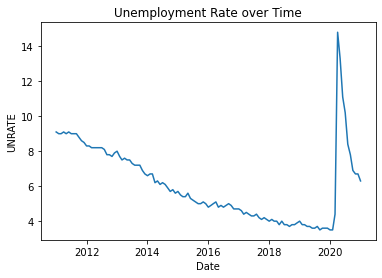

<IPython.core.display.Javascript object>

In [36]:
sns.lineplot(x=df["Date"], y=df["UNRATE"])
plt.title("Unemployment Rate over Time")
plt.show()

Based on the plot, it appears that at times the unemployment rate appears to be linear, however, with the dramatic uptick in the rate in 2020, it is obviously stochastic. 

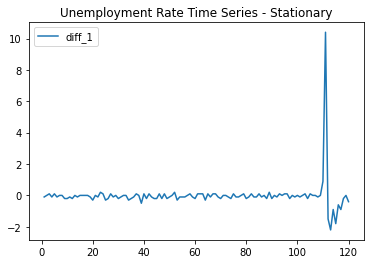

<IPython.core.display.Javascript object>

In [38]:
df["diff_1"] = df.UNRATE - df.UNRATE.shift()
df.plot(y="diff_1")
plt.title("Unemployment Rate Time Series - Stationary")
plt.show()

Generate and interpret a PACF for the time series (and/or its differences).


Text(0.5, 1.0, 'Unemployment PACF')

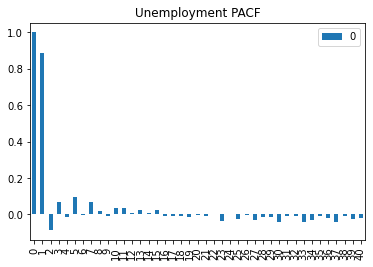

<IPython.core.display.Javascript object>

In [40]:
x_acf = pd.DataFrame(pacf(df.UNRATE))
x_acf.plot(kind="bar")
plt.title("Unemployment PACF")

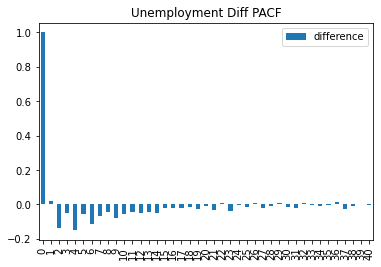

<IPython.core.display.Javascript object>

In [41]:
x_acf = pd.DataFrame(pacf(df.diff_1[1:]))
x_acf.plot(kind="bar")
plt.title("Unemployment Diff PACF")
plt.legend(["difference"])

Generate five ARIMA specifications and evaluate their efficacy at modeling your data.


In [43]:
model = ARIMA(df.UNRATE, order=(0, 1, 0))
model_fit = model.fit()
print(model_fit.summary())
print("Residuals Description")
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  120
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -172.014
Method:                           css   S.D. of innovations              1.015
Date:                Mon, 15 Feb 2021   AIC                            348.029
Time:                        20:48:54   BIC                            353.604
Sample:                             1   HQIC                           350.293
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0233      0.093     -0.252      0.801      -0.205       0.158
Residuals Description
count    1.200000e+02
mean     9.755459e-09
std      1.018875e+00
min     -2.176667e+00
25%     -1.766667e-01

<IPython.core.display.Javascript object>

In [44]:
model = ARIMA(df.UNRATE, order=(1, 0, 0))
model_fit = model.fit()
print(model_fit.summary())
print("Residuals Description")
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                 UNRATE   No. Observations:                  121
Model:                     ARMA(1, 0)   Log Likelihood                -170.727
Method:                       css-mle   S.D. of innovations              0.986
Date:                Mon, 15 Feb 2021   AIC                            347.453
Time:                        20:48:57   BIC                            355.841
Sample:                             0   HQIC                           350.860
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.2607      0.753      8.310      0.000       4.784       7.737
ar.L1.UNRATE     0.8877      0.041     21.765      0.000       0.808       0.968
                                    Roots   

<IPython.core.display.Javascript object>

In [45]:
model = ARIMA(df.UNRATE, order=(1, 0, 1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print("Residuals Description")
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                 UNRATE   No. Observations:                  121
Model:                     ARMA(1, 1)   Log Likelihood                -170.281
Method:                       css-mle   S.D. of innovations              0.982
Date:                Mon, 15 Feb 2021   AIC                            348.562
Time:                        20:48:58   BIC                            359.745
Sample:                             0   HQIC                           353.104
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.2294      0.698      8.919      0.000       4.860       7.598
ar.L1.UNRATE     0.8652      0.051     16.810      0.000       0.764       0.966
ma.L1.UNRATE     0.1054      0.111      0.95

<IPython.core.display.Javascript object>

In [46]:
model_111 = ARIMA(df.UNRATE, order=(1, 1, 1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print("Residuals Description")
print(model_111_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  120
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -171.425
Method:                       css-mle   S.D. of innovations              1.010
Date:                Mon, 15 Feb 2021   AIC                            350.850
Time:                        20:48:59   BIC                            362.000
Sample:                             1   HQIC                           355.378
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0236      0.096     -0.246      0.806      -0.212       0.164
ar.L1.D.UNRATE    -0.7125      0.318     -2.239      0.025      -1.336      -0.089
ma.L1.D.UNRATE     0.7820      0.281

<IPython.core.display.Javascript object>

In [47]:
model = ARIMA(df.UNRATE, order=(5, 1, 5))
model_fit = model.fit()
print(model_fit.summary())
print("Residuals Description")
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  120
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -167.385
Method:                       css-mle   S.D. of innovations              0.958
Date:                Mon, 15 Feb 2021   AIC                            358.769
Time:                        20:49:07   BIC                            392.219
Sample:                             1   HQIC                           372.353
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0063      0.057      0.111      0.912      -0.105       0.118
ar.L1.D.UNRATE    -0.7273      0.426     -1.706      0.088      -1.563       0.108
ar.L2.D.UNRATE     1.5140      0.150

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<IPython.core.display.Javascript object>

Finally, choose one specification and make a case for it as a logical model for your dataset.
This should come in the form of a Notebook with descriptions that explain your process. Remember to use text, visuals, and analysis to tell a clear and concise story with your data.

Text(0.5, 1.0, 'Histogram of Residuals')

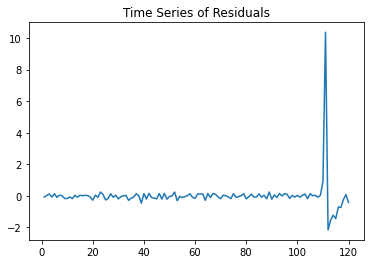

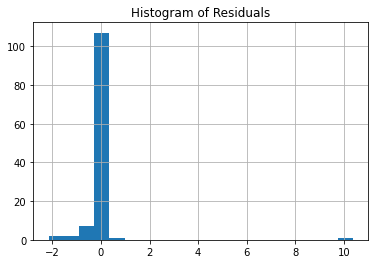

<IPython.core.display.Javascript object>

In [48]:
residuals = pd.DataFrame(model_111_fit.resid)

residuals.plot(legend=False)
plt.title("Time Series of Residuals")

residuals.hist(bins=20)
plt.title("Histogram of Residuals")